# Problem Definition

Real estate agents want help to predict the house price for regions in the USA. <br>
He gave you the dataset to work on <br>
Create a model that will help him to estimate what the house would sell for.

In a statement,
> Given parameters about a house, can we predict the Price of that house

## 2. Data

The data is available on [Kaggle](https://www.kaggle.com/vedavyasv/usa-housing)

You can download the dataset [here...](https://github.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/blob/master/USA_Housing.csv)

The database contains 7 attributes. **Attributes** (also called **features**) are the variables <br>
that we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can <br>
be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are the different housing parameters and the dependent variable <br>
is Price of a house

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.


> If we can reach 90% +  accuracy at predicting the `Price`of a house during the proof of concept, 
we'll pursure ththis project.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### USA Housing Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is <br>
where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (Price)

1. ‘Avg. Area Income’ – Average income of the householder of the city house is located.
2. ‘Avg. Area House Age’ – Average Age of Houses in the same city.
3. ‘Avg. Area Number of Rooms’ – Average Number of Rooms for Houses in the same city.
4. ‘Avg. Area Number of Bedrooms’ – Average Number of Bedrooms for Houses in the same city.
5. ‘Area Population’ – Population of the city.
6. ‘Price’ – Price that the house sold at.
7. ‘Address’ – Address of the houses.



**Note:** No personal identifiable information (PPI) can be found in the dataset.


## Preparing the tools


The libraries we use will differ from project to project. But there are a few prerequesite <br>one we will use
during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.
* [Statsmodels](https://www.statsmodels.org/stable/index.html) for statistical analysis

<h6>Before starting <span class="label label-danger">IMPORTANT</span></h6>
Throughout this project, I will be introducing some **reproducible functions** that can be <br> 
used in any machine learning project to automate the process: <br>

* Model Evaluation: Function `evaluate` to make evaluations on on our model 
* Model Comparison: Function `fit_and_score` to visualise and compare model scores

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">PROJECT CONTENT</h3>
     
> ### 1. EXPLORATORY DATA ANALYSIS

> ### 2. FEATURE IMPORTANCE

> ### 3. MODELLING

> ### 4. EVALUATION

> ### 5. HYPERPARAMETER TUNING

#### Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from scipy import stats
sns.set()
%matplotlib inline 
sns.set_style("darkgrid")

#### Estimators and evaluation metrics which would be used for Modelling

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,KFold, GridSearchCV

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [5]:
dataset = pd.read_csv("data/USA_Housing.csv")
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
dataset.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [7]:
dataset.shape

(5000, 7)

There are 5000 rows and 7 columns

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
#Checking for missing values in the dataset
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

There are no null values in the dataset

### Removing unimportant features 

In order to increase the predictive power of our model we have <br>
to outwardly remove feature(s) that would obviously have less predictive power <br>

Looking at the features,the `Address` variable would be less important since <br>
the Address of a house would have less impact on our target variable

In [11]:
data_new = dataset.drop("Address", axis = 1)
data_new.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [12]:
data_new.describe(percentiles = [0.99, 0.01, 0.85])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
1%,43792.673024,3.648537,4.620750,2.020000,13983.282591,4.049730e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
85%,79501.038042,7.013728,8.029750,5.390000,46255.778785,1.595741e+06
99%,93763.704782,8.274282,9.295532,6.460000,59975.113934,2.050598e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Exploratory Data Analysis

Making some analysis on our target variable

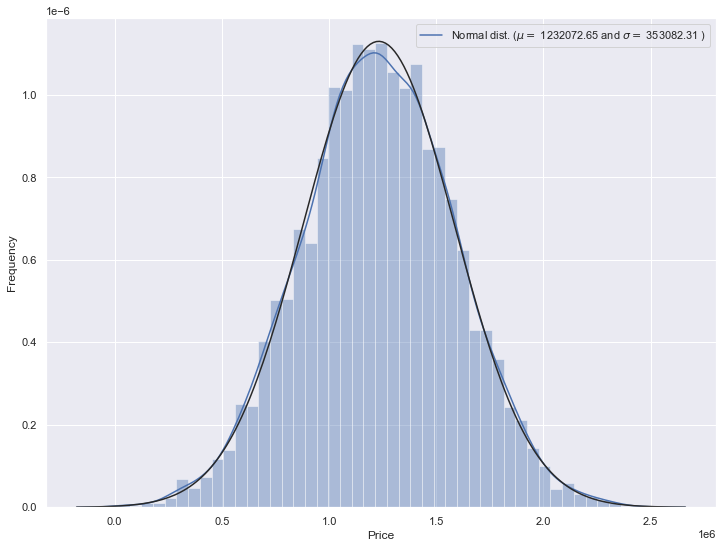

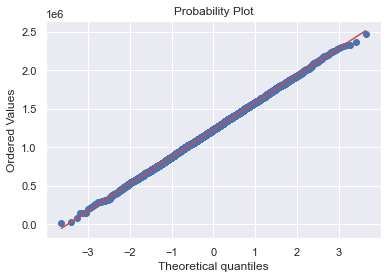

In [13]:
plt.subplots(figsize = (12, 9))
sns.distplot(data_new["Price"], hist = True, kde = True, fit = stats.norm)

#Getting the fitted parameters used by the function--> mean and standard deviation
(mu, sigma) = stats.norm.fit(data_new["Price"])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data_new["Price"], plot=plt)
plt.show()

Our target variable `Price` follows a `Normal Distribution` so there is no need to transform it

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

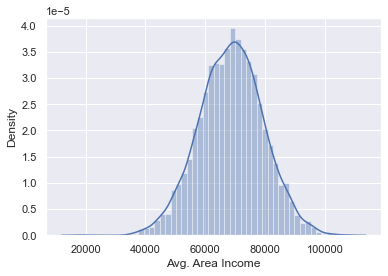

In [14]:
# Visualising Avg. Area Income
sns.distplot(data_new["Avg. Area Income"], hist = True, kde = True)

The `Avg. Area Income` follows a normal and unimodal distribution <br>
and ranges roughly from 20000 to 100000 with majority of the data points
between 50000 and and 90000

<AxesSubplot:xlabel='Area Population', ylabel='Density'>

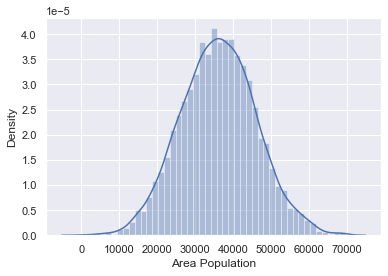

In [15]:
sns.distplot(data_new["Area Population"], hist = True, kde = True)

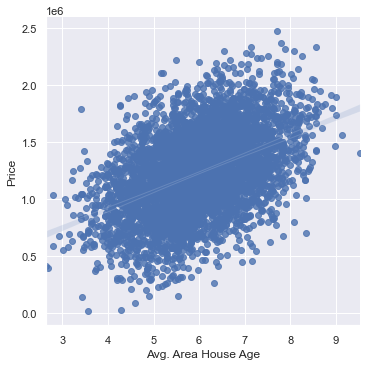

In [16]:
sns.lmplot(x = "Avg. Area House Age", y = "Price", data = data_new)

As seen above, there is a linear positive correlation between <br>
`Avg. Area House Age` and `Price`

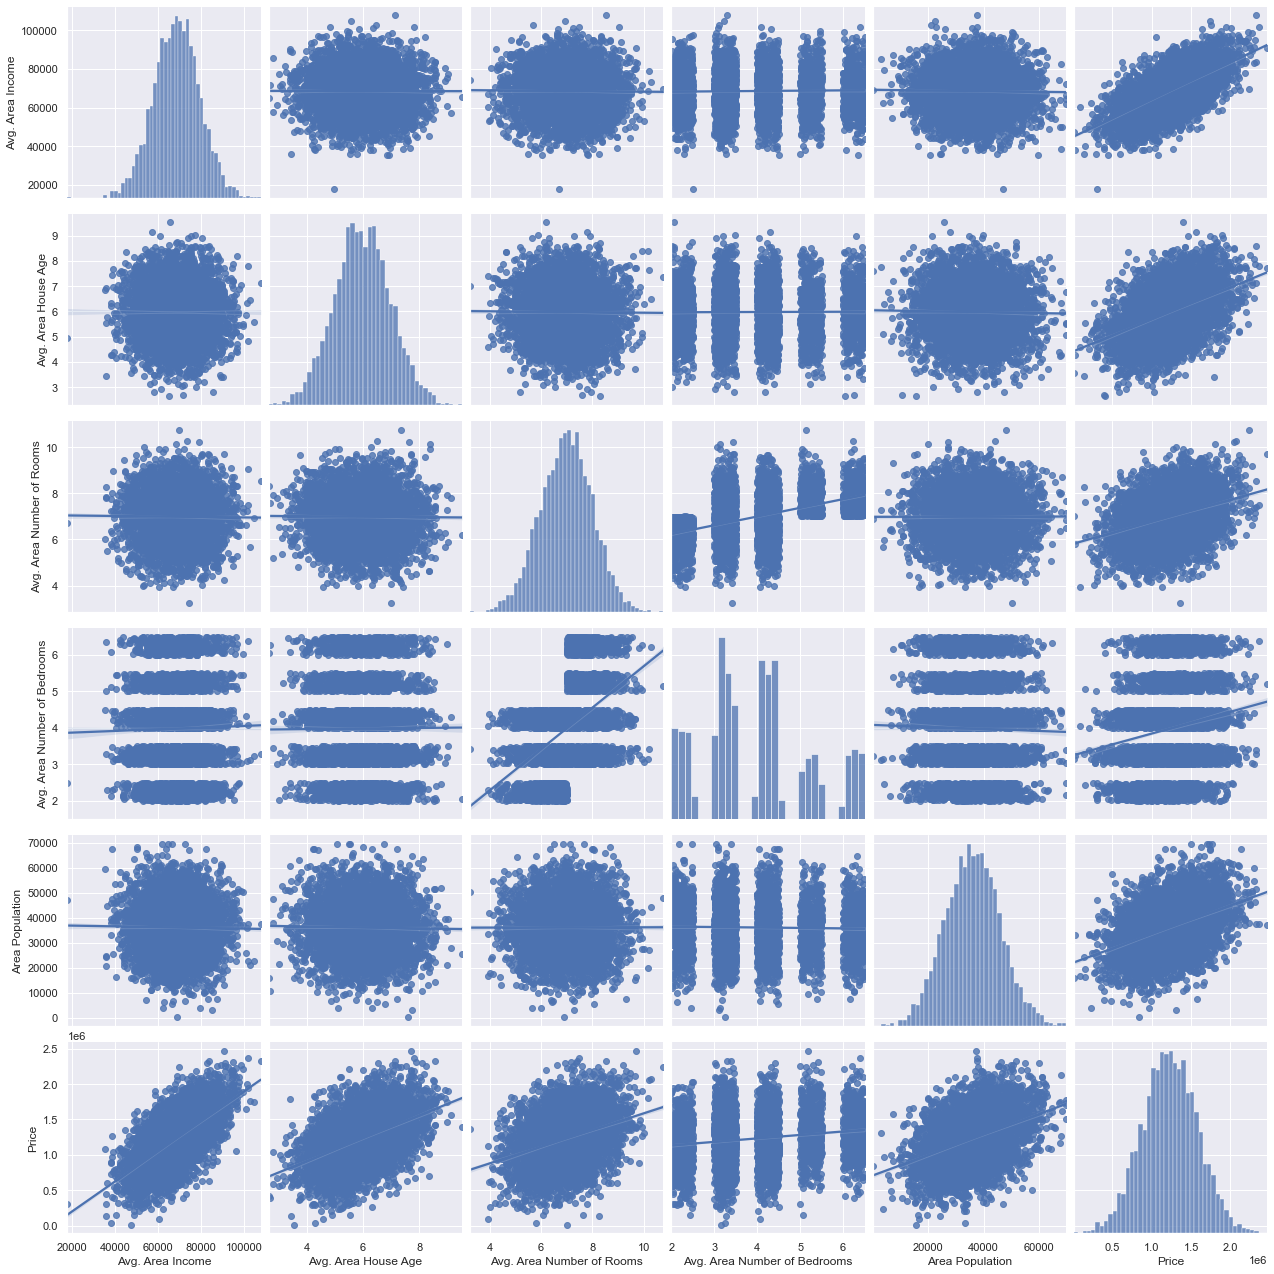

In [17]:
sns.pairplot(data = data_new,size = 3, kind= "reg")

# Feature Importance 

#### Correlation plot

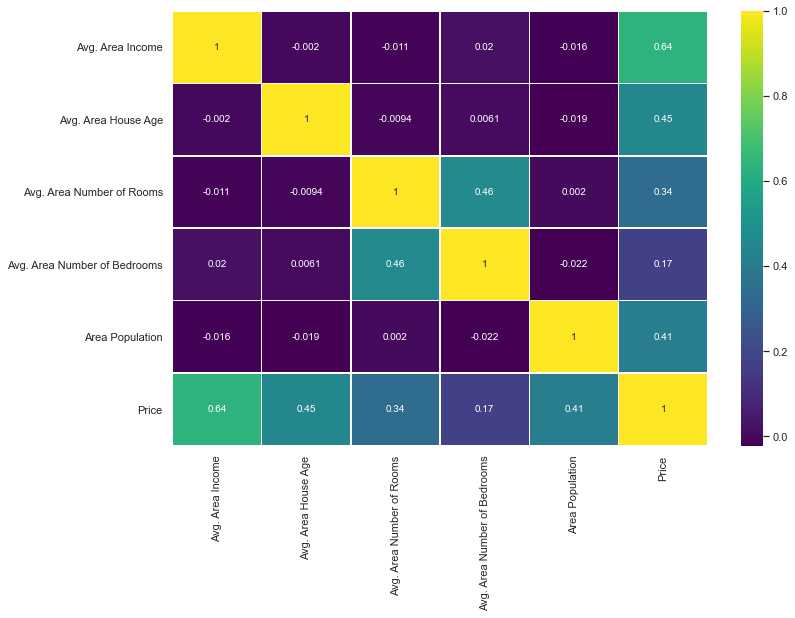

In [20]:
plt.subplots(figsize = (12, 8))
#Creating a correlation matrix
corr = data_new.corr()
#Correlation plot
sns.heatmap(corr, annot = True, linewidths = 0.5, cmap = "viridis");

`Avg. Area Income` is highly correlated with the target feature `Price` by 64%

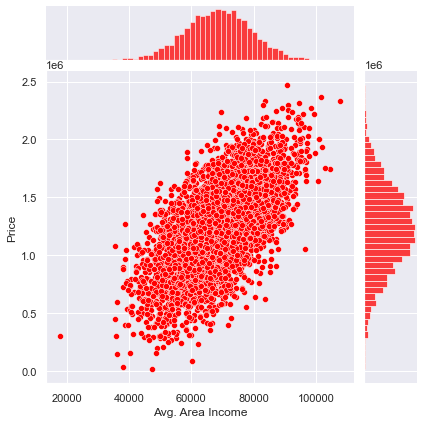

In [21]:
sns.jointplot(x = "Avg. Area Income", y = "Price", data = data_new, color = "red")

In [22]:
print("Finding the most important features")

df_corr = data_new.corr()
df_corr.sort_values(["Price"], ascending = False, inplace = True)
df_corr["Price"]

Finding the most important features


Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

In [23]:
#Split the dataset into independent and dependent variable

#Everything except the target variable
X = data_new.drop("Price", axis = 1)
y = data_new["Price"]

### Backward Elimination
Backward Elimination is a feature selection technique while building <br>
a machine learning model. It is used to used remove those features <br>
that do not have a significant effect on the dependent variable or <br>
prediction of the output. 

Basically what we do in backward elimination is to remove variable <br>
with [p-value](https://en.wikipedia.org/wiki/P-value) higher than 0.05 <br>
and fit the model on the remaining variables. This is an iterative process <br>

Here, we will make extensive use of [Statsmodels](https://www.statsmodels.org/stable/index.html)

For more information on Backward Elimination and other StepWise Regression <br>
techniques [click here..](https://en.wikipedia.org/wiki/Stepwise_regression)

In [25]:
#Creating a column of ones
X_new = np.append(arr = np.ones((5000, 1)).astype(int), values = X, axis = 1)

#Specifying our features
X_opt = X_new[:, [0, 1, 2, 3, 4, 5]]

#Fitting our model(Ordinary Least Squares)
regressor_OLS = sm.OLS(endog = y, exog = X_opt ).fit()

In [26]:
#Creating our regression summary
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:19:35   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.637e+06   1.72e+04   -153.708      0.000   -2.67e+06    -2.6e+06
x1            21.5780      0.134    160.656      0.000      21.315      21.841
x2          1.656e+05   1443.413    114.754      0.000    1.63e+05    1.68e+05
x3          1.207e+05   1605.160     75.170      0.000    1.18e+05    1.24e+05
x4          1651.1391   1308.671      1.262      0.207    -914.431    4216.709
x5            15.2007      0.144    105.393      0.000      14.918      15.483
==============================================================================
Omnibus:                        5.580   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                4.959
Skew:                           0.011   Prob(JB):                       0.0838
Kurtosis:                       2.847   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>*From the summary table above, the variables corresponds to 
the following* : 

* const --> constant values(ones)
* x1 --> Avg. Area Income	
* x2 --> Avg. Area House Age	
* x3 --> Avg. Area Number of Rooms	
* x4 --> Avg. Area Number of Bedrooms	
* x5 --> Area Population	

As discussed earlier, the feature with p-value higher than 0.05 <br>
will be removed and that variable is x4 which rightly corresponds <br>
to `Avg. Area Number of Bedrooms`


### Intuition
Removing the `Avg. Area Number of Bedrooms` feature makes a lot of sense <br>
because the it highly correlates with the `Avg. Area Number of Rooms` variable <br>
which creates [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) 

To learn more about multicollinearity you can read [this](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/) article 

In [28]:
#Updating our new features 
X_opt2 = X_new[:, [0, 1, 2, 3, 5]] # "Avg.Area Number of Bedrooms" has been excluded
regressor_OLS2 = sm.OLS(endog = y, exog = X_opt2 ).fit()
regressor_OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:19:48   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.638e+06   1.72e+04   -153.726      0.000   -2.67e+06    -2.6e+06
x1            21.5827      0.134    160.743      0.000      21.320      21.846
x2          1.657e+05   1443.404    114.769      0.000    1.63e+05    1.68e+05
x3          1.216e+05   1422.608     85.476      0.000    1.19e+05    1.24e+05
x4            15.1961      0.144    105.388      0.000      14.913      15.479
==============================================================================
Omnibus:                        5.310   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.742
Skew:                           0.011   Prob(JB):                       0.0934
Kurtosis:                       2.851   Cond. No.                     9.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now all the variables left have a p-value less than 0.05

In [29]:
#Creating new features without the `Avg. Area Number of Bedrooms`
X_processed = X.drop("Avg. Area Number of Bedrooms", axis = 1)
X_processed

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035
4996,78491.275435,6.999135,6.576763,25616.115489
4997,63390.686886,7.250591,4.805081,33266.145490
4998,68001.331235,5.534388,7.130144,42625.620156


# Modelling

In [30]:
#Splitting our data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.20, random_state = 42)

### Evaluation Metrics 


In [31]:
def evaluate(model, X_train, X_test,y_train, y_test):
    """
    This function evaluates our regression model
    model : estimator to be used
    X_train : input training values
    X_test : input test values
    y_train :label training data
    y_test : label test data
    """
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print("Mean Absolute Error : ", mean_absolute_error(y_test, y_preds))
    print("Mean squared error :", mean_squared_error(y_test, y_preds))
    print("R^2 score : ", r2_score(y_test, y_preds) )
    print("Adjusted R^2 :", 1-(mean_squared_error(y_test, y_preds)/y_test.var()))

In [32]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "Gradient Boosting": GradientBoostingRegressor(), 
          "Random Forest": RandomForestRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Linear Regression': 0.9181214278738089,
 'Gradient Boosting': 0.9037919715894245,
 'Random Forest': 0.8861815765991431}

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

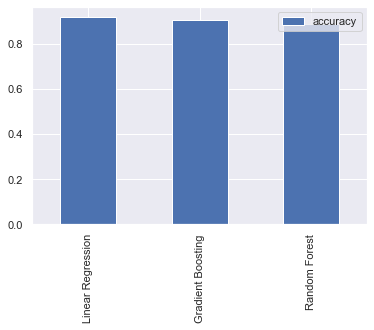

In [34]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.legend(loc = "best" );

`Linear Regression` and `GradientBoostingRegressor`have a greater performance

Since GradientBoostingRegressor is proactive and has a lot of optimization methods, <br>
let's us to resort to it though LinearRegresson has a comparatively higher accuracy

### GradientBoostingRegressor

In [57]:
#Randomly putting in some hyperparameters
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls',
          'random_state': 42}

GBR = GradientBoostingRegressor(**params)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500, random_state=42)

## Plotting Training deviance

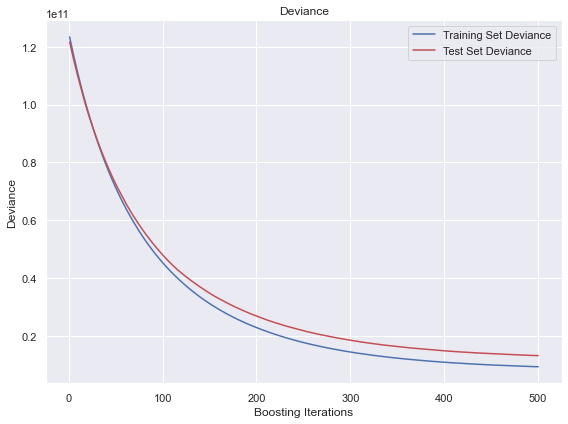

In [36]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(GBR.staged_predict(X_test)):
    test_score[i] = GBR.loss_(y_test, y_pred)

fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, GBR.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

## Plot feature Importance 

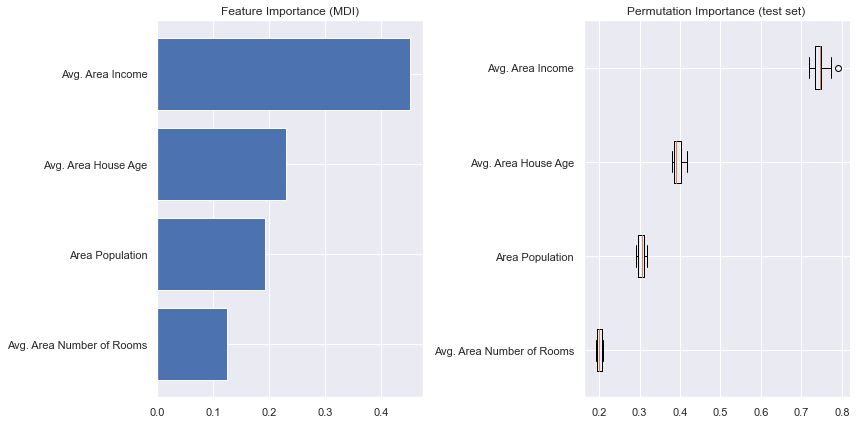

In [58]:
from sklearn.inspection import permutation_importance

feature_importance = GBR.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_processed.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(GBR, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2, )
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_processed.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout();

In [48]:
#Evaluating GradientBoostingRegressor

evaluate(GBR, X_train, X_test, y_train, y_test)

Mean Absolute Error :  90116.4760165751
Mean squared error : 13097511289.247593
R^2 score :  0.8935442568549513
Adjusted R^2 : 0.8936507125980964


Our Boosting Regressor has great *$R^{2}$* which corresponds well with our Adjusted *$R^{2}$*

In [49]:
#Making predictions with our GBR
y_preds = GBR.predict(X_test)

# Hyperparameter Tuning our GradientBoostingRegressor

## Baseline Model

>The purpose of the baseline model is to have something to compare our `gradient boosting model` to. 
Therefore, all we will do here is create  several regression trees. 
The difference between the regression trees will be the `max depth.` 
The max depth has to with the number of nodes python can make to try to purify the classification.  
We will then decide which tree is best based on the mean squared error.
The first thing we need to do is set the arguments for the cross-validation. 
Cross validating the results helps to check the accuracy of the results.

In [50]:
crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
    tree_regressor= DecisionTreeRegressor(max_depth=depth,
                                              random_state=1)
    if tree_regressor.fit(X_train,y_train).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_regressor,X,y,scoring = "neg_mean_squared_error", cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 -94429522928.86246
2 -75829743290.62534
3 -61968124090.18501
4 -49751382253.06281
5 -42328021541.799515
6 -36023148443.13057
7 -31743345499.61505
8 -28889728155.76101
9 -27266467168.595955


What we really want to do is to minimize the error in our GradientBoostingRegressor

In [51]:
GBR=GradientBoostingRegressor()

#Creating a grid of different hyperparameters
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
              "random_state":[1]}

#Using GridSearchCV to detect the best hyperparameters
search=GridSearchCV(estimator=GBR,
                    param_grid=search_grid,
                    scoring='neg_mean_squared_error',
                    n_jobs=1,cv=crossvalidation, 
                    verbose = 2)

In [68]:
search.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5, total=   1.6s
[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5, total=   1.4s
[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5, total=   1.4s
[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5, total=   1.4s
[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5, total=   1.4s
[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5, total=   1.4s
[CV] learning_rate=0.001, max_depth=1, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_est

[CV]  learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75, total=   4.0s
[CV] learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75, total=   3.7s
[CV] learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75, total=   5.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75, total=   4.3s
[CV] learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75, total=   3.8s
[CV] learning_rate=0.001, max_depth=1, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001

[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, random_state=1, subsample=1, total=   6.7s
[CV] learning_rate=0.001, max_depth=1, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, random_state=1, subsample=1, total=   6.7s
[CV] learning_rate=0.001, max_depth=1, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=2000, random_state=1, subsample=1, total=   7.3s
[CV] learning_rate=0.001, max_depth=2, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=500, random_state=1, subsample=0.5, total=   2.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=500, random_state=1, subsample=0.5, total=   2.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=500, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimato

[CV]  learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75, total=   5.7s
[CV] learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75, total=   5.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75, total=   5.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75, total=   5.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75, total=   5.7s
[CV] learning_rate=0.001, max_depth=2, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001

[CV]  learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1, total=  11.7s
[CV] learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1, total=  12.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1, total=  12.0s
[CV] learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1, total=  11.7s
[CV] learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1, total=  12.3s
[CV] learning_rate=0.001, max_depth=2, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=20

[CV]  learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5, total=   6.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5, total=   6.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5, total=   6.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5, total=   6.3s
[CV] learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.75, total=   8.6s
[CV] learning_rate=0.001, max_depth=4, n_estimators=1000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_d

[CV]  learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75, total=  17.8s
[CV] learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1, total=  23.5s
[CV] learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1, total=  27.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1, total=  21.5s
[CV] learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1, total=  21.6s
[CV] learning_rate=0.001, max_depth=4, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators

[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5, total=   2.9s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5, total=   3.5s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5, total=   2.9s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5, total=   3.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5, total=   2.9s
[CV] learning_rate=0.01, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_esti

[CV]  learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.6s
[CV] learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.6s
[CV] learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.6s
[CV] learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.6s
[CV] learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=1, total=   6.6s
[CV] learning_rate=0.01, max_depth=1, n_estimators=2000, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, n_est

[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5, total=   3.9s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5, total=   4.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5, total=   3.9s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5, total=   3.9s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5, total=   4.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_esti

[CV]  learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  10.3s
[CV] learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  10.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  10.3s
[CV] learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  12.6s
[CV] learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  10.3s
[CV] learning_rate=0.01, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth

[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5, total=   6.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5, total=   7.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=1000, ra

[CV]  learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75, total=  17.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75, total=  17.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75, total=  17.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75, total=  17.8s
[CV] learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75, total=  17.9s
[CV] learning_rate=0.01, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.01, max_depth

[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1, total=   1.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1, total=   1.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1, total=   1.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1, total=   1.6s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, random_state=1, subsample=1, total=   1.6s
[CV] learning_rate=0.1, max_depth=1, n_estimators=1000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=1000, random_state=1, subsample

[CV]  learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.5, total=   5.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.6s
[CV] learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.5s
[CV] learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75, total=   6.6s
[CV] learning_rate=0.1, max_depth=1, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=1, n_estima

[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1, total=   3.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1, total=   2.9s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1, total=   2.9s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1, total=   3.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1, total=   2.9s
[CV] learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=500, random_state=1, subsample=1, 

[CV]  learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5, total=   8.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5, total=   8.5s
[CV] learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.5, total=   7.8s
[CV] learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  10.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75, total=  10.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=2, n_estimators

[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1, total=   5.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=500, random_state=1, subsample=1, 

[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5, total=  13.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5, total=  21.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5, total=  16.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5, total=  14.7s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.5, total=  15.9s
[CV] learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=200

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 92.0min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [71]:
#Best hyperparameters
search.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.5}

In [146]:
new_grid = {'learning_rate': 0.1,
             'max_depth': 1,
             'n_estimators': 1000,
             'random_state': 1,
             'subsample': 0.5}

In [73]:
search.best_score_

-10845227365.516415

>After hyperparameter tuning we can see that the mean squared error is <br>
lower compared to those of our baseline model <br>
So now we can reset our hyperparameters with the best ones and see how <br>
they perform on our data

**`Cross Validation`**

In [52]:
GBR2=GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1,subsample=.5,max_depth= 1,random_state=1)

#Cross-validating our scores to check for overfittingv
score=np.mean(cross_val_score(GBR2,X,y,scoring='r2',cv=crossvalidation,n_jobs=1))
print("Cross-Validated Score : ", score)

Cross-Validated Score :  0.9125117203997368


In [53]:
GBR2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=1000, random_state=1,
                          subsample=0.5)

In [54]:
GBR2.score(X_test, y_test)

0.9140277271419497

Our score shows there is apparently no Over-fitting comparing it to ourcross-validated score

In [55]:
evaluate(GBR2, X_train, X_test, y_train, y_test)

Mean Absolute Error :  82567.5656171044
Mean squared error : 10577379679.61346
R^2 score :  0.9140277271419497
Adjusted R^2 : 0.9141136994148078


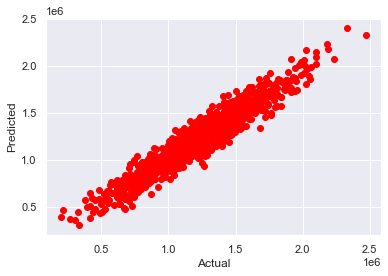

In [87]:
#Comparing Actual to Predictions 

compare =  pd.DataFrame({"Actual" : y_test, "Prediction": GBR2.predict(X_test)})
plt.scatter(compare["Actual"], compare["Prediction"], c= "red")
plt.xlabel("Actual")
plt.ylabel("Predicted");

### References
* [Gradient Boosting Regression(Scikit_Learn)](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py)

* [Adjusted $R^{2}$(Statistics By Jim)](https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/)